In [69]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/clean/df_join_clean.csv')

In [70]:
# Total visits in each group
total_visits = df.groupby('Variation')['visit_id'].nunique()
print("Total Visits: ")
display(total_visits)

# Steps for unique visits
funnel = pd.crosstab(
    index=df['Variation'],
    columns=df['process_step'],
    values=df['visit_id'],
    aggfunc='nunique'
)
print("\n\nFunnel Conversion Totals:")
display(funnel)

# conversion_rates = funnel.div(total_visits, axis=0) * 100
conversion_rates = funnel.apply(lambda x: (x / total_visits) * 100)
print("\n\nFunnel Conversion Rates:")
display(conversion_rates.round(2))


Total Visits: 


Variation
Control    32020
Test       36906
Name: visit_id, dtype: int64



Funnel Conversion Totals:


process_step,0,1,2,3,4
Variation,,,,,
Control,30749,23419,20021,18195,15948
Test,32956,28110,24354,22055,21583




Funnel Conversion Rates:


process_step,0,1,2,3,4
Variation,,,,,
Control,96.03,73.14,62.53,56.82,49.81
Test,89.30,76.17,65.99,59.76,58.48


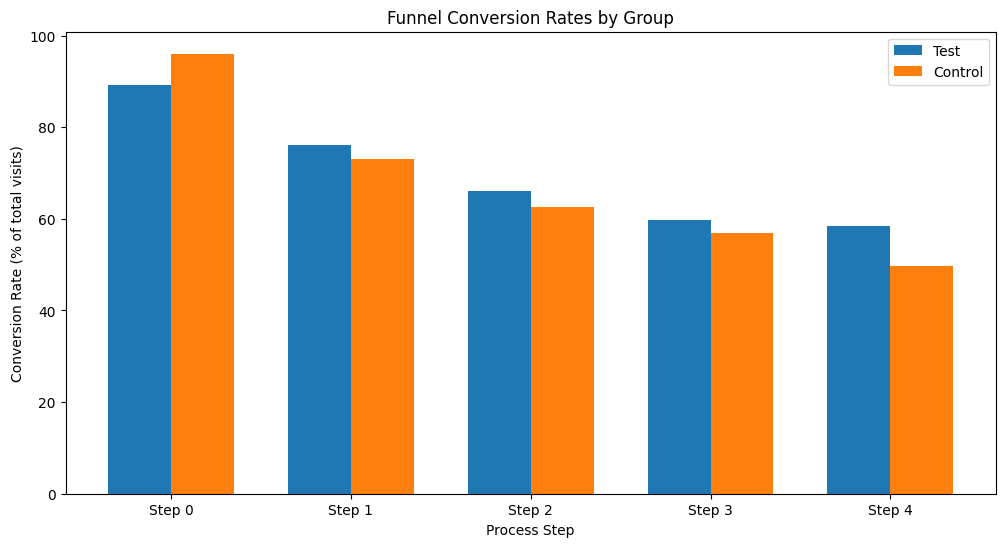

In [ ]:

# Chart

plt.figure(figsize=(12, 6))
bar_width = 0.35
steps = range(len(conversion_rates.columns))

plt.bar(steps, conversion_rates.loc['Test'], bar_width, label='Test')
plt.bar([x + bar_width for x in steps], conversion_rates.loc['Control'], 
        bar_width, label='Control')

plt.xlabel('Process Step')
plt.ylabel('Conversion Rate (% of total visits)')
plt.title('Funnel Conversion Rates by Group')
plt.xticks([x + bar_width/2 for x in steps], [f'Step {x}' for x in steps])
plt.legend()
plt.show()
